In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [2]:
file_path = '../output/rerun-bck-lowprob/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.05&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.15&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.25&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.3&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt']


In [3]:
cfg = get_config('../cfg/rerun_lower_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [4]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [5]:
print(orig)
print(wo_drop)
print(ours)

[4.928, 4.824, 4.944, 4.932, 4.96, 4.96, 4.988]
[4.004, 5.064, 5.844, 6.348, 6.76, 7.036, 7.28]
[3.98, 4.02, 4.056, 4.072, 4.092, 4.116, 4.228]


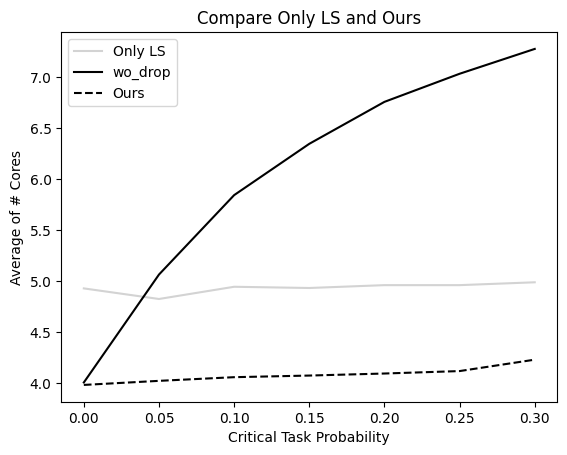

In [6]:
plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray')
plt.plot(criticality_prob_list, wo_drop, label='wo_drop', color='black')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed')

plt.title('Compare Only LS and Ours')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()

In [20]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [21]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [22]:
print(orig)
print(wo_drop)
print(ours)

[7.52, 8.14, 8.48, 7.98, 7.9, 8.36, 8.34, 8.0, 8.96, 8.54, 8.14]
[3.96, 12.34, 18.5, 21.92, 24.44, 25.62, 27.18, 26.16, 24.2, 21.3, 8.14]
[3.96, 3.92, 4.24, 4.4, 4.52, 5.1, 5.38, 6.0, 7.14, 7.56, 8.14]


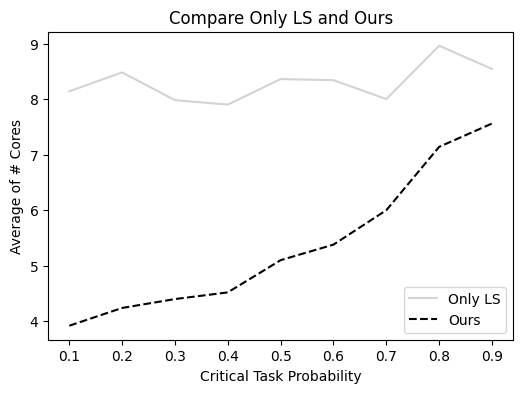

In [23]:
plt.figure(figsize=(6,4))

plt.plot(criticality_prob_list[1:-1], orig[1:-1], label='Only LS', color='lightgray')
# plt.plot(criticality_prob_list[1:-1], wo_drop[1:-1], label='wo_drop', color='black')
plt.plot(criticality_prob_list[1:-1], ours[1:-1], label='Ours', color='black', linestyle='dashed')

# # set y lim
# plt.ylim(3, 9)

plt.title('Compare Only LS and Ours')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()

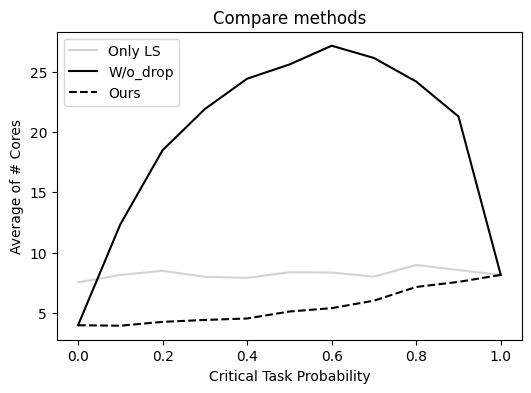

In [24]:
plt.figure(figsize=(6,4))

plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray')
plt.plot(criticality_prob_list, wo_drop, label='W/o_drop', color='black')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed')

plt.title('Compare methods')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()